In [1]:
import numpy as np
import pandas as pd
import sys


In [2]:
df = pd.read_csv('datasets/gpa_iq.csv')
print(df)

    obs    gpa   iq  gender  placement
0     1  7.940  111       2          1
1     2  8.292  107       2          1
2     3  4.643  100       2          0
3     4  7.470  107       2          1
4     5  8.882  114       1          1
..  ...    ...  ...     ...        ...
73   85  9.000  112       1          1
74   86  9.500  112       1          1
75   87  6.057  114       2          1
76   88  6.057   93       1          1
77   89  6.938  106       2          1

[78 rows x 5 columns]


In [125]:
df = df.drop(['obs'],axis=1)
df = df.drop(['gender'],axis=1)
df

,gpa,iq,placement
0,7.940,111,1
1,8.292,107,1
2,4.643,100,0
3,7.470,107,1
4,8.882,114,1
...,...,...,...
73,9.000,112,1
74,9.500,112,1
75,6.057,114,1
76,6.057,93,1


In [127]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gpa        78 non-null     float64
 1   iq         78 non-null     int64  
 2   placement  78 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


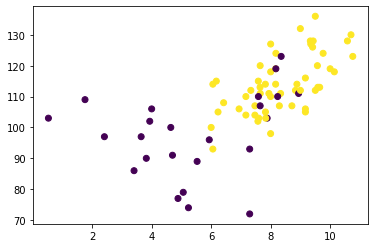

In [128]:
import matplotlib.pyplot as plt
plt.scatter(df['gpa'],df['iq'],c=df['placement'])

In [136]:
#Logistic Regression
# Feature Selection
x = df.iloc[:,0:2]
y = df.iloc[:,-1]
print(x,y)

      gpa   iq
0   7.940  111
1   8.292  107
2   4.643  100
3   7.470  107
4   8.882  114
..    ...  ...
73  9.000  112
74  9.500  112
75  6.057  114
76  6.057   93
77  6.938  106

[78 rows x 2 columns] 0     1
1     1
2     0
3     1
4     1
     ..
73    1
74    1
75    1
76    1
77    1
Name: placement, Length: 78, dtype: int64


In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

len(x_test)


16

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [155]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [156]:
y_pred = clf.predict(x_test)
print(y_pred)


[0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1]


In [157]:
y_test

50    0
2     0
24    1
23    1
64    1
29    1
1     1
19    1
42    1
59    0
73    1
67    1
3     1
49    1
21    0
15    1
Name: placement, dtype: int64

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

<Axes: >

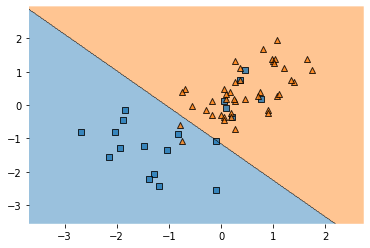

In [159]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=0)

In [160]:
import pickle
pickle.dump(clf,open('model.pk','wb'))